In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
glcm_0_df = pd.read_csv('glcm_0.csv', sep='\t').sample(frac=1)
glcm_45_df = pd.read_csv('glcm_45.csv', sep='\t').sample(frac=1)
glcm_90_df = pd.read_csv('glcm_90.csv', sep='\t').sample(frac=1)
glcm_135_df = pd.read_csv('glcm_135.csv', sep='\t').sample(frac=1)
glcm_complex_df = pd.read_csv('glcm_complex.csv', sep='\t').sample(frac=1)
glcm_complex_duplex_df = pd.read_csv('glcm_complex_duplex.csv', sep='\t').sample(frac=1)

all_datasets = [glcm_0_df, glcm_45_df, glcm_45_df, glcm_135_df, glcm_complex_df, glcm_complex_duplex_df]
df_names = ['glcm_0_df', 'glcm_45_df', 'glcm_45_df', 'glcm_135_df', 'glcm_complex_df', 'glcm_complex_duplex_df']
glcm_complex_duplex_df.head()

,name,energy,contrast,homogenity,correlation,variance,entropy,pathology
21,patho_15.bmp,0.001034,58.904500,0.165480,0.000274,3614.137321,7.200173,1
6,patho_23.bmp,0.002491,19.297490,0.271946,0.001215,812.974736,6.469514,1
45,norma_11.bmp,0.000730,72.637927,0.159730,0.000121,8225.129756,7.546994,0
44,norma_10.bmp,0.001913,46.523319,0.181669,0.000132,7577.096977,6.548294,0
18,patho_12.bmp,0.000942,57.487816,0.165318,0.000276,3596.290146,7.323378,1


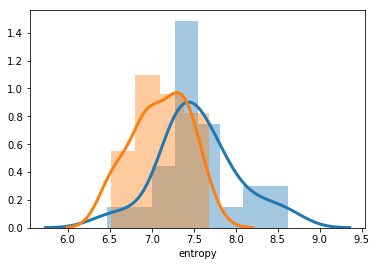

In [22]:
patho = glcm_complex_duplex_df[glcm_complex_duplex_df['pathology'] == 1]
norma = glcm_complex_duplex_df[glcm_complex_duplex_df['pathology'] == 0]
sns.distplot(patho['entropy'], kde=True, kde_kws={'linewidth': 3})
sns.distplot(norma['entropy'], kde=True, kde_kws={'linewidth': 3})

In [8]:
def visualize_pairplot(df):
    no_name_df = df[1:]
    sns.pairplot(
        no_name_df,
        kind='reg',
        hue='pathology',
        plot_kws={
            'line_kws':{'color':'red'},
                'scatter_kws': {'alpha': 0.1}
        },
        diag_kind='hist')

In [61]:
def density_plot(df):
    plt.rcParams["figure.figsize"] = (20, 30)
    features = ['energy', 'contrast', 'homogenity', 'correlation', 'variance', 'entropy']
#     if feature not in features:
#         print("Wrong feature")
#         print("Choose from: ", features)

    patho = df[df['pathology'] == 1]
    norma = df[df['pathology'] == 0]
    
    for (i, f) in enumerate(features):
        plt.subplot(3, 2, i + 1)
        sns.distplot(patho[f], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='pathology')
        sns.distplot(norma[f], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='norma')
        plt.title('Density Plot of ' + f)
        plt.legend(prop={'size': 15})
        
    plt.show()

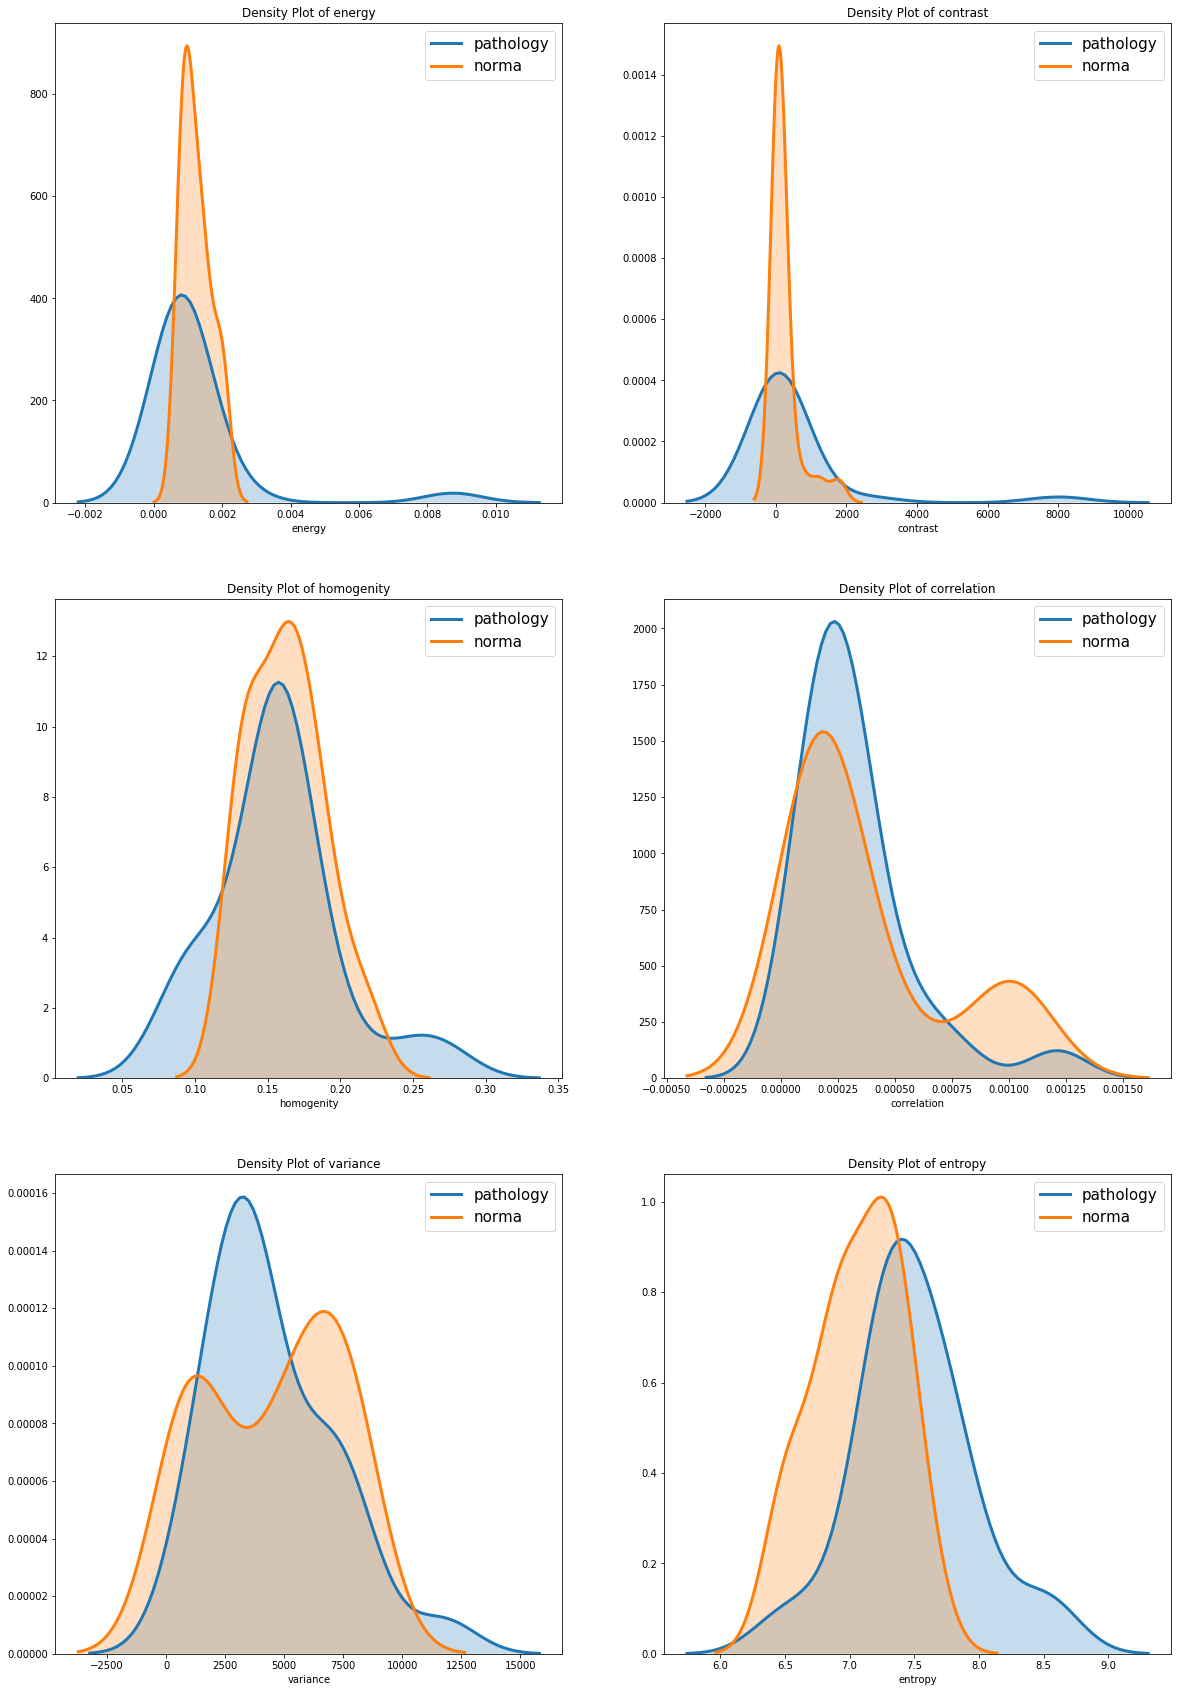

In [62]:
density_plot(glcm_complex_df)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


def get_data(df):
    no_name = df.loc[:, df.columns != 'name']
    no_name = no_name.loc[:, ['energy', 'entropy', 'contrast', 'pathology']]
    X = no_name.iloc[:, :-1]
    y = no_name.iloc[:, -1]
    
    patho = no_name.loc[y == 1]
    norma = no_name.loc[y == 1]
    
    X_train = X[:int(len(X)/2)]
    X_test = X[int(len(X)/2):]
    
    y_train = y[:int(len(y)/2)]
    y_test = y[int(len(y)/2):]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_data(glcm_135_df)

model = LogisticRegression()
polynomial_features = PolynomialFeatures(degree=2)

x_poly = polynomial_features.fit_transform(X_train)

def logistic_regression(df):
    X_train, X_test, y_train, y_test = get_data(df)
    
    model = LogisticRegression(
        random_state=0,
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=200
    )
    
    model.fit(X_train, y_train)
    predicted_classes = model.predict(X_test)
    accuracy = accuracy_score(y_test, predicted_classes)
    return accuracy



for name, df in zip(df_names, all_datasets):
    acc = logistic_regression(df)
    print('Dataset: ', name, '. Accuracy: ', int(acc * 100), '%')

# def polynomial_regression(df):
#     X_train, X_test, y_train, y_test = get_data(df)
    
    
# print(list(zip(predicted_classes, y_test)))

# print(type(accuracy))
# print("Accuracy of model is " + float(accuracy.sum())/accuracy.shape + "%")
# print(predicted_classes)

Dataset:  glcm_0_df . Accuracy:  52 %
Dataset:  glcm_45_df . Accuracy:  48 %
Dataset:  glcm_45_df . Accuracy:  48 %
Dataset:  glcm_135_df . Accuracy:  68 %
Dataset:  glcm_complex_df . Accuracy:  76 %
Dataset:  glcm_complex_duplex_df . Accuracy:  60 %
